<a href="https://colab.research.google.com/github/joyc3lin/datasci_6_regression/blob/main/hha507assignment6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading and Cleaning Dataset: Life Expectancy

In [6]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [7]:
#checking size
print(df.shape)

(2938, 22)


In [9]:
# checking data types
for c in df.columns:
  print(f"{c}: {type(df[c][3])}")

Country: <class 'str'>
Year: <class 'numpy.int64'>
Status: <class 'str'>
Life expectancy : <class 'numpy.float64'>
Adult Mortality: <class 'numpy.float64'>
infant deaths: <class 'numpy.int64'>
Alcohol: <class 'numpy.float64'>
percentage expenditure: <class 'numpy.float64'>
Hepatitis B: <class 'numpy.float64'>
Measles : <class 'numpy.int64'>
 BMI : <class 'numpy.float64'>
under-five deaths : <class 'numpy.int64'>
Polio: <class 'numpy.float64'>
Total expenditure: <class 'numpy.float64'>
Diphtheria : <class 'numpy.float64'>
 HIV/AIDS: <class 'numpy.float64'>
GDP: <class 'numpy.float64'>
Population: <class 'numpy.float64'>
 thinness  1-19 years: <class 'numpy.float64'>
 thinness 5-9 years: <class 'numpy.float64'>
Income composition of resources: <class 'numpy.float64'>
Schooling: <class 'numpy.float64'>


In [10]:
# looking for missing values
missing_values = df.isnull().sum()
missing_values

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
# dropping row with missing data
df.dropna(inplace=True)
df.shape

(1649, 22)

In [12]:
# checking to see if all missing values have been dropped
missing_valuesre = df.isnull().sum()
missing_valuesre

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [15]:
# cleaning column names

# Function to remove white space and special characters from a value
def clean_value(value):
    cleaned_value = re.sub(r'\s+|[^a-zA-Z0-9]', '', str(value))
    return cleaned_value

df.rename(mapper=clean_value, axis=1, inplace=True)
df

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIVAIDS,GDP,Population,thinness119years,thinness59years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# **Simple Linear Regression**

### Picking variables:

**Dependent Variable (DV)**: Life Expectancy in age (*Lifeexpectancy*)

**independent Variable (IV)**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) (*AdultMortality*)

In [20]:
# Fit the regression model
X1 = sm.add_constant(df['AdultMortality'])  # Adds a constant term to the predictor
model1 = sm.OLS(df['Lifeexpectancy'], X1)
results1 = model1.fit()

In [21]:
# Print summary of the regression
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     1605.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          1.38e-245
Time:                        03:41:33   Log-Likelihood:                -5364.0
No. Observations:                1649   AIC:                         1.073e+04
Df Residuals:                    1647   BIC:                         1.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             77.5982      0.258    300.

In [22]:
residuals1 = results1.resid
fitted1 = results1.fittedvalues

### **Checking Assumptions**

In [23]:
# Assessing linearity of the relationship
stat, p_value = linear_rainbow(results1)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.0046702669083754, p-value=0.47337374375207475


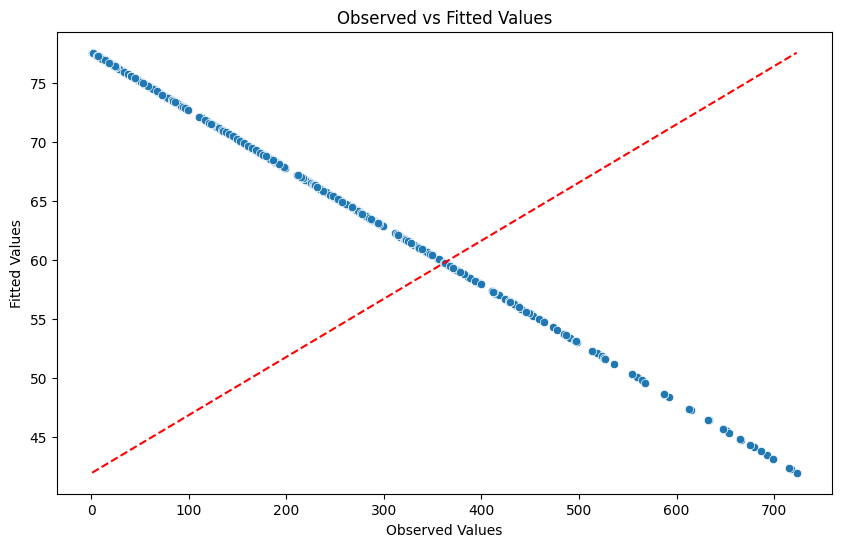

In [25]:
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['AdultMortality'], y=fitted1)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['AdultMortality']), max(df['AdultMortality'])], [min(fitted1), max(fitted1)], color='red', linestyle='--')
plt.show()

In [26]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals1)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.8970646262168884, p-value=7.093370784507364e-32


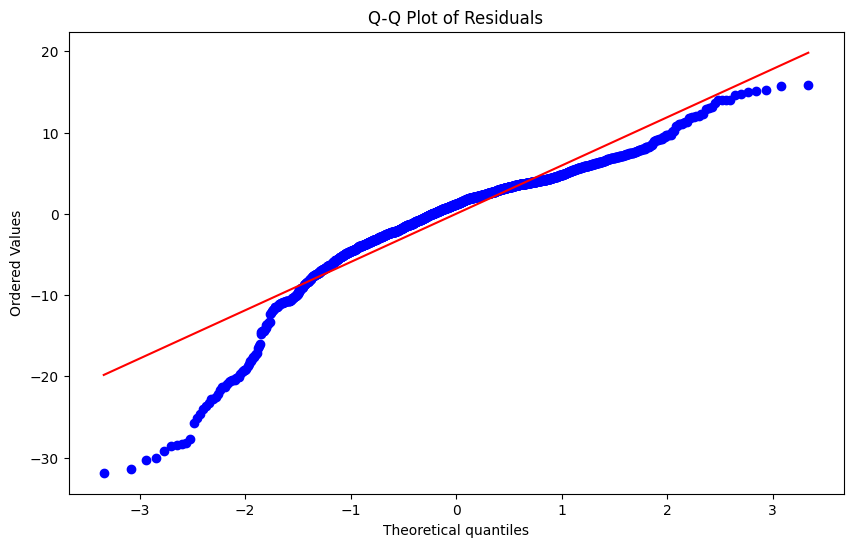

In [27]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals1, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [30]:
# Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals1, results1.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.2560859869541876, p-value=0.0005473009845125026


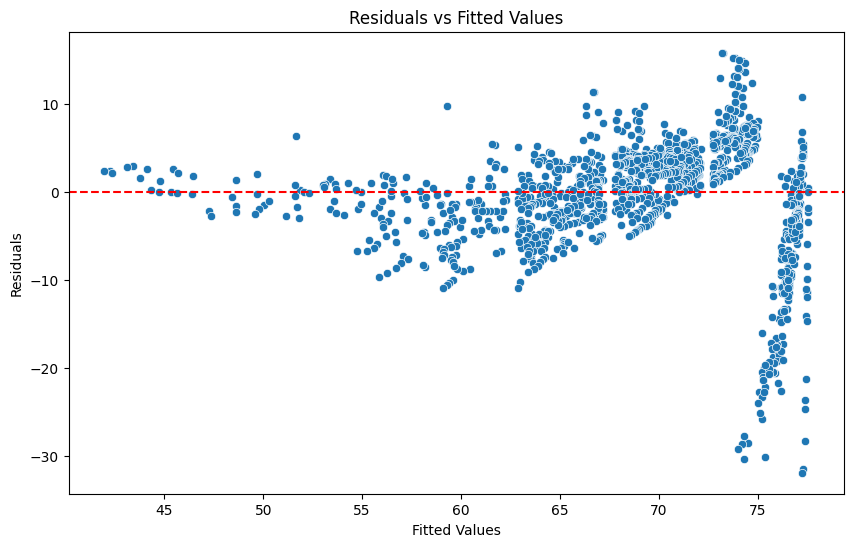

In [31]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted1, y=residuals1)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# **Multiple Linear Regression**

### Picking variables:

**Dependent Variable (DV)**: Life Expectancy in age (*Lifeexpectancy*)

**independent Variable1 (IV1)**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%) (*HepatitisB*)

**independent Variable2 (IV2)**: Measles - number of reported cases per 1000 population (*Measles*)

**independent Variable3 (IV3)**: Number of years of Schooling(years) (*Schooling*)

**independent Variable4 (IV4)**: Average Body Mass Index of entire population (*BMI*)

In [36]:
# Fit the regression model
X2 = df[['HepatitisB','Measles','Schooling', 'BMI']]
X2 = sm.add_constant(X2)  # Adds a constant term to the predictor
y = df['Lifeexpectancy']
model2 = sm.OLS(y, X2)
results2 = model2.fit()

In [37]:
# Print summary of the regression
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     523.2
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          3.36e-291
Time:                        03:57:41   Log-Likelihood:                -5247.9
No. Observations:                1649   AIC:                         1.051e+04
Df Residuals:                    1644   BIC:                         1.053e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.3132      0.732     56.406      0.0

In [38]:
residuals2 = results2.resid
fitted2 = results2.fittedvalues

### **Checking Assumptions**

In [40]:
# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X2.columns
vif_data['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
     Variable        VIF
0       const  25.921199
1  HepatitisB   1.060159
2     Measles   1.035927
3   Schooling   1.485713
4         BMI   1.462262


In [41]:
### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results2)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.2980294471220093, p-value=9.490617059704891e-05


In [43]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals2)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9539445638656616, p-value=2.2359324560645453e-22


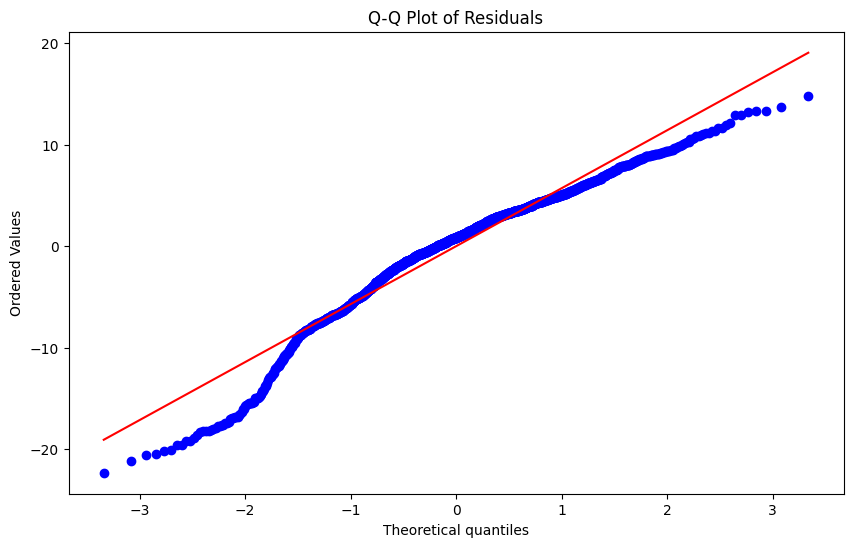

In [44]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals2, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [46]:
##### Assessing the homogeneity of variance of the residuals
gq_test2 = het_goldfeldquandt(residuals2, results2.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test2[0]}, p-value={gq_test2[1]}")

Goldfeld-Quandt Test: F-statistic=1.5490650618924762, p-value=2.2164742522730663e-10


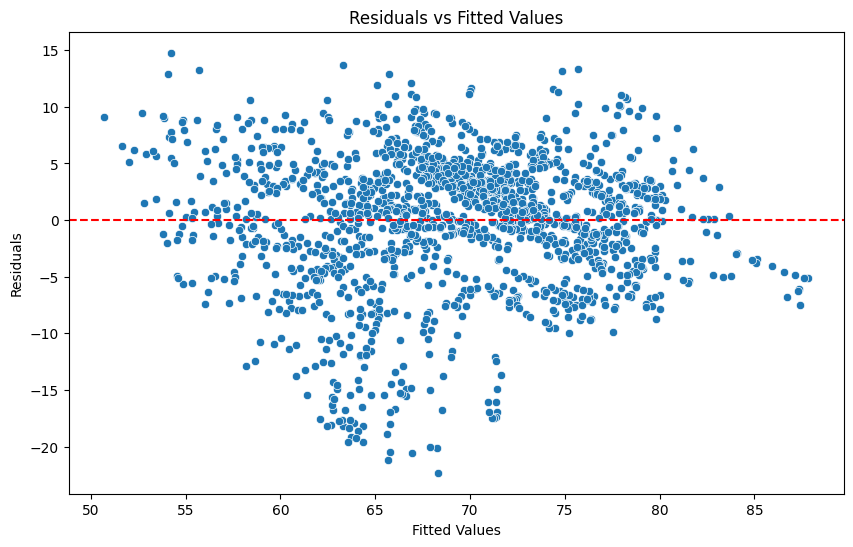

In [47]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted2, y=residuals2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()